In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame(pd.read_excel("Dataset_for_Prediction.xlsx"))
data.head()

,Year,Area,Production,Yield,Predominantly reddish medium texture,Red desert soils,Sandy loam,Soil are lithosolsat foot hills & alluvials in plains,brown soils,clay loam,...,District_Ваran,District_Наnumangarh,District_Раli,Season_Kharif,Season_Rabi,Crop_Bajra,Crop_Barley,Crop_Jowar,Crop_Rapeseed &Mustard,Crop_Wheat
0,1997,56600,30400.0,0.537102,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1997,105900,34600.0,0.326723,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1997,24700,28900.0,1.170040,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1997,36700,25400.0,0.692098,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1997,79300,144500.0,1.822194,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [3]:
data.isnull().sum()

Year                                      0
Area                                      0
Production                                9
Yield                                    20
 Predominantly reddish medium texture     0
                                         ..
Crop_Bajra                                0
Crop_Barley                               0
Crop_Jowar                                0
Crop_Rapeseed &Mustard                    0
Crop_Wheat                                0
Length: 71, dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
x = data.drop("Yield",axis=1)
y = data[["Yield"]]

cols = ['Yield',' Predominantly reddish medium texture', ' Red desert soils',
       ' Sandy loam', ' Soil are lithosolsat foot hills & alluvials in plains',
       ' brown soils', ' clay loam',
       ' coarse sand in texture some places calcareous',
       ' deep soils in valleys', ' eastern part alluvial', ' foot hills',
       ' groundwater salinity', ' high soluble salts & exchangeable sodium',
       ' loamycoarse in texture & calcareous',
       ' nature of recently alluvial calcareous has been observed',
       ' sallow depth red soils in depressions', ' shallow on hills',
       ' well drained calcareous', ' west north west lithosols',
       'Alluvial deposites calcareous', 'Alluvial prone to water logging',
       'Black of alluvial origin', 'Desert soils and sand dunes aeolian soil',
       'Predominantly reddish medium texture', 'Red desert soils',
       'Sandy loam', 'Sierozens',
       'Soil are lithosolsat foot hills & alluvials in plains',
       'Mean_Seasonal_Rainfall']

#selected parameters
x1 = data.drop(cols,axis=1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x1 = std.fit_transform(x1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=71)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.02, random_state=71)

In [6]:
x_train = x_train.reshape(x_train.shape[0],-1).T
x_test =  x_test.reshape(x_test.shape[0],-1).T
y_train = y_train.reshape(y_train.shape[0],-1).T

In [7]:
def model(x,y,dim,learning_rate):
    w = np.zeros((dim,1))
    b = 0.0

    m = x.shape[1]
    A = np.dot(w.T,x)+b
    cost = (1/(m))*np.sum((A-y)**2)

    dz = (1/m)*(A-y)
    dw = np.dot(x,dz.T)
    db = np.sum(dz)

    costs = []

    for i in range (200):
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
    
        if i%1000 == 0:
            costs.append(cost)
        
    parameters = {"w":w,"b":b}
    gradients = {"dw":dw,"db":db}
    
    return parameters, gradients, cost



In [8]:
def pred (w,b,x):
    m = x.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(x.shape[0],1)
    
    y_pred = np.dot(w.T,x)+b
    
    return y_pred

In [9]:
parameters, gradients, cost = model(x_train,y_train,70,0.001)
cost

1.0198119517753892

In [10]:
w = parameters["w"]
b = parameters["b"]

In [11]:
pred_all = pred(w,b,x_test)

In [13]:
pred_all = pred_all.reshape(pred_all.shape[0],-1).T
print(pred_all.shape)
print(y_test.shape)

(73, 1)
(73, 1)


In [14]:
auc_test = 100 - np.mean(np.abs(pred_all - y_test)*100)
auc_test

92.09301584199703

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
 
print("R2score:", r2_score(y_test,pred_all))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:', mean_absolute_error(y_test, pred_all))

R2score: 0.737347767385024
RMSE: 0.09606976093705671
MAE: 0.07906984158002965


In [16]:
x1_train = x1_train.reshape(x1_train.shape[0],-1).T
x1_test =  x1_test.reshape(x1_test.shape[0],-1).T

In [19]:
parameters, gradients, cost = model(x1_train,y_train,42,0.001)
cost

1.0198119517753892

In [20]:
w = parameters["w"]
b = parameters["b"]

In [21]:
pred_sel = pred(w,b,x1_test)
pred_sel = pred_sel.reshape(pred_sel.shape[0],-1).T

In [22]:
auc_test1 = 100 - np.mean(np.abs(pred_sel - y_test)*100)
auc_test1

91.16665107775859

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
 
print("R2score:", r2_score(y_test,pred_sel))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_sel)))
print('MAE:', mean_absolute_error(y_test, pred_sel))

R2score: 0.6721446803333357
RMSE: 0.10733399123627024
MAE: 0.08833348922241419


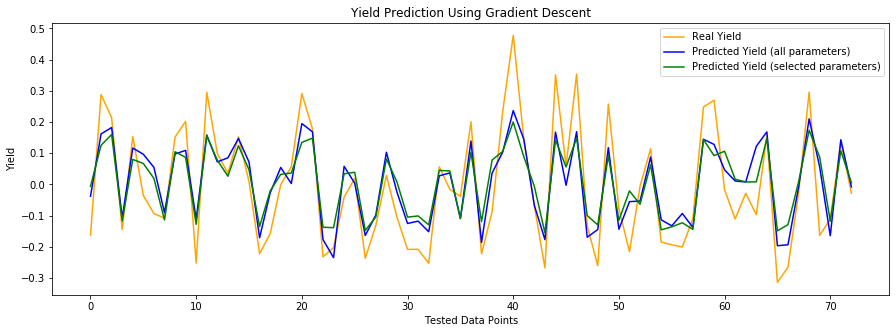

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(pred_all, color='blue',label='Predicted Yield (all parameters)')
plt.plot(pred_sel, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using Gradient Descent')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()